# Parkinson's Classification Model

#### Parkinson’s is a long-term degenerative disorder of the central nervous system that mainly affects the motor system.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("D:\\Datascience\\DataSets\\parkinsons.data")

In [3]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

# Information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

MDVP:Fo (Hz)	Average vocal fundamental frequency
MDVP:Fhi (Hz)	Maximum vocal fundamental frequency
MDVP:Flo (Hz)	Minimum vocal fundamental frequency
Five measures of variation in fundamental frequency: MDVP:Jitter (Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
Six measures of variation in amplitude: MDVP:Shimmer,MDVP:Shimmer (dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
Two measures of ratio of noise to tonal components in the voice:,NHR,HNR
Two nonlinear dynamical complexity measures:RPDE,D2
Signal fractal scaling exponent:DFA
Three nonlinear measures of fundamental frequency variation:Spread 1,Spread 2,PPE
Status:Health status of the subject: one, Parkinson’s; zero, healthy


# Descriptive Statistics about the data

In [5]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

# Handling Missing Values

In [6]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Correlation Graph

In [7]:
df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

<AxesSubplot:>

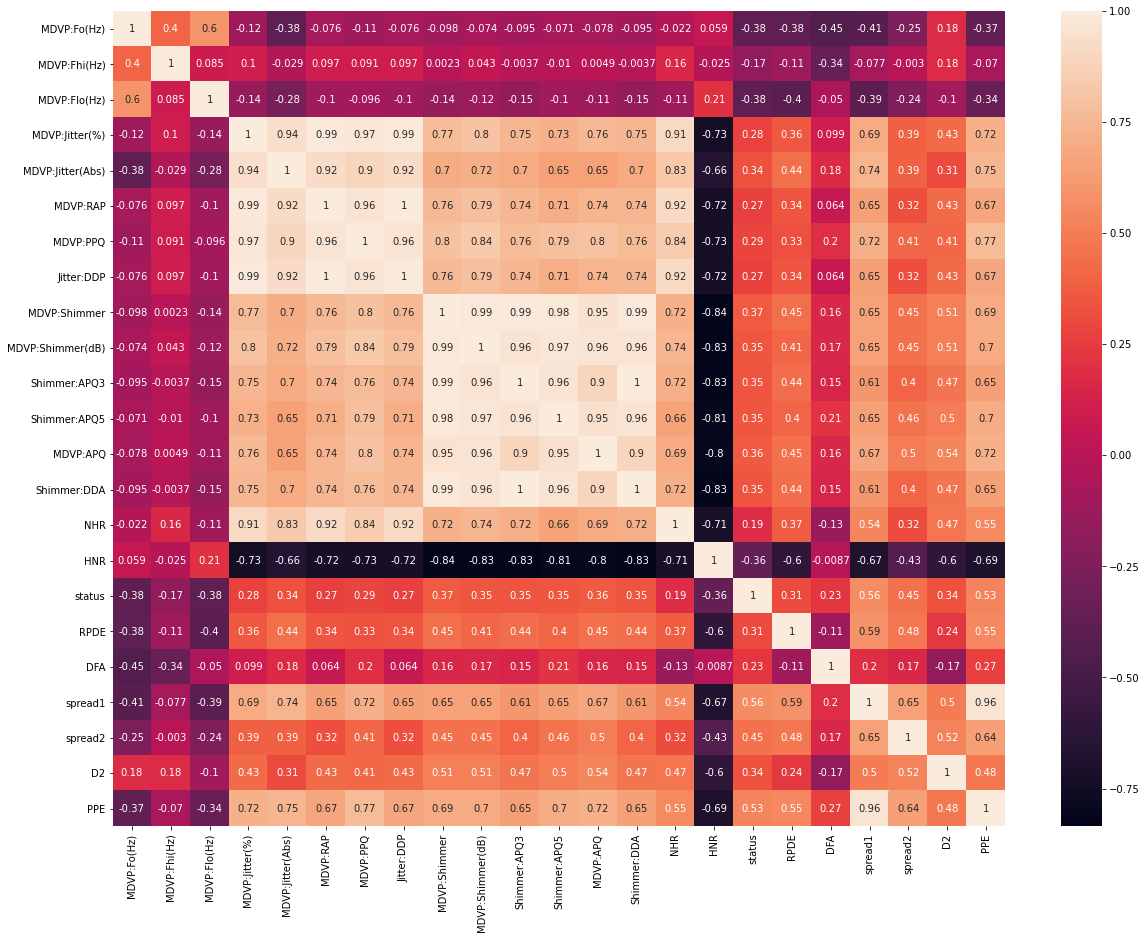

In [8]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

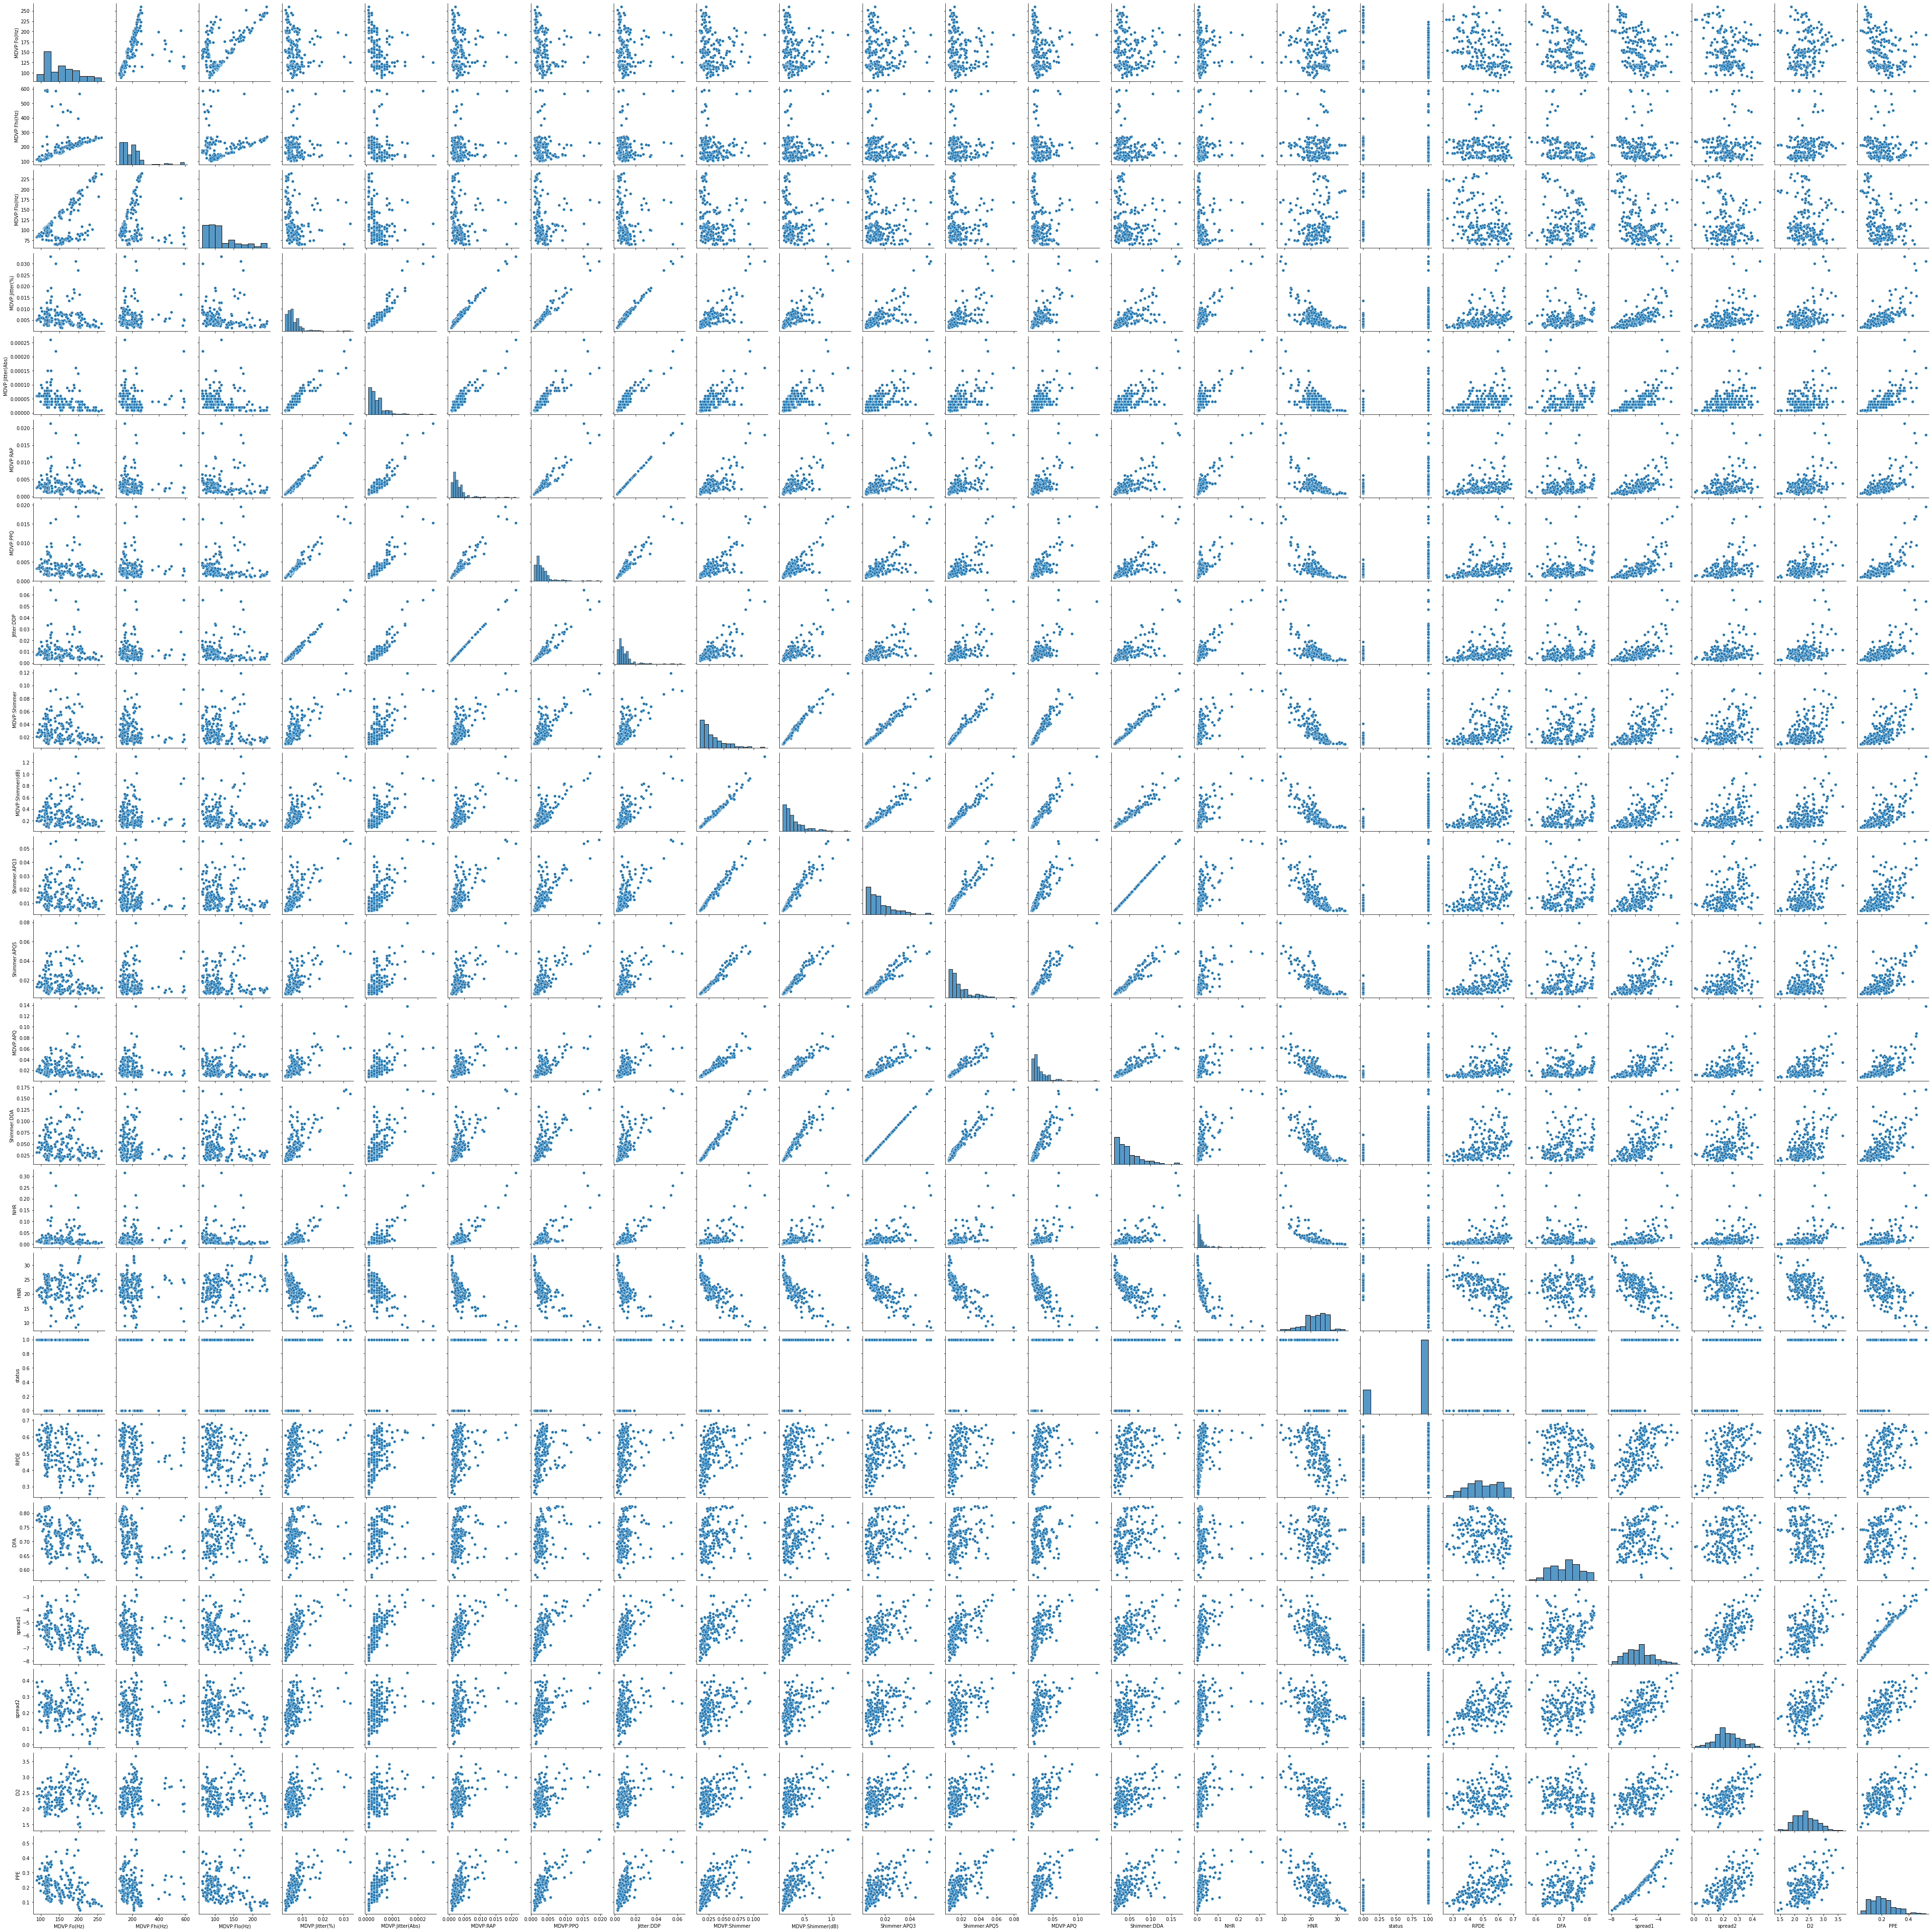

In [9]:
sns.pairplot(df)

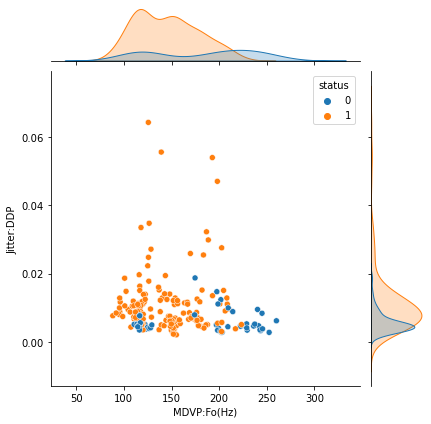

In [10]:
sns.jointplot(data=df,x="MDVP:Fo(Hz)",y="Jitter:DDP",hue="status")

#### There is no relationship between Average Vocal fundamental Frequency and variation in fundamental frequency

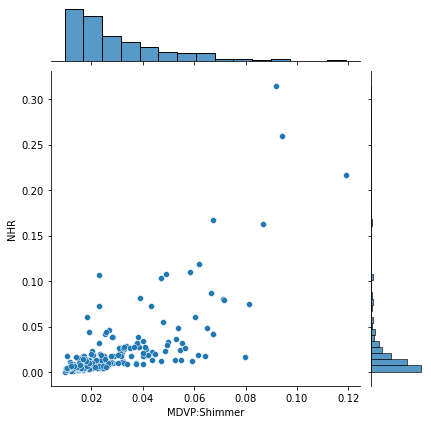

In [11]:
sns.jointplot(x="MDVP:Shimmer",y="NHR",data=df)

#### There is slight positive relationship between measures of variation in amplitude and the ratio of noise to tonal components in the voice

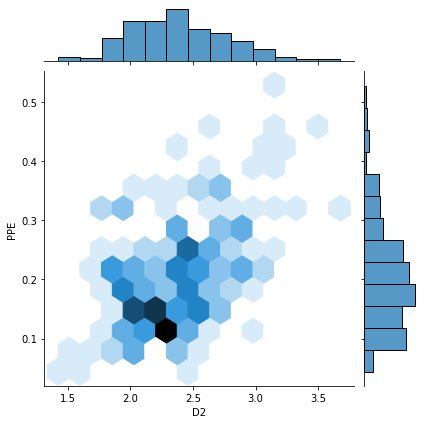

In [12]:
sns.jointplot(x="D2",y="PPE",data=df,kind="hex" )

In [13]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:ylabel='status'>

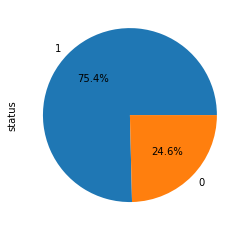

In [14]:
df["status"].value_counts().plot.pie(autopct="%.1f%%")

# Handling Skewness

In [15]:
df.drop(["name"],axis=1,inplace=True)

MDVP:Fo(Hz)
0.5871758758264713


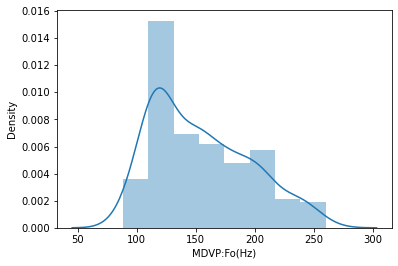

MDVP:Fhi(Hz)
2.5225490936388146


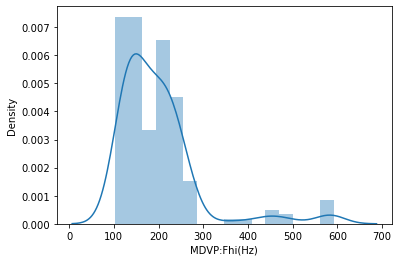

MDVP:Flo(Hz)
1.2079661332354688


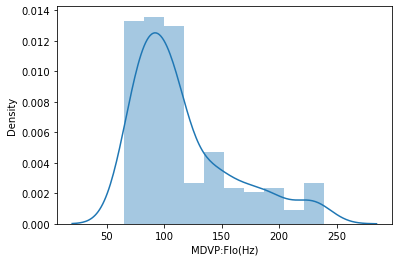

MDVP:Jitter(%)
3.061164957386332


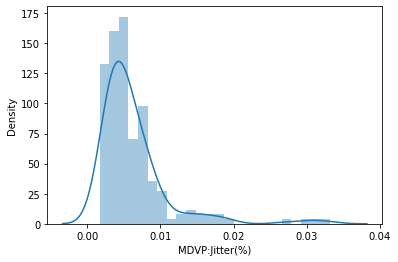

MDVP:Jitter(Abs)
2.6286502455329948


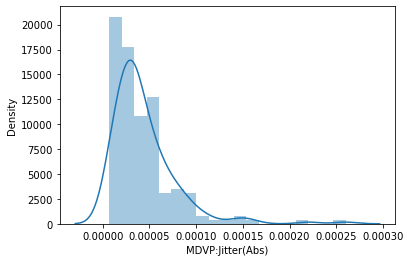

MDVP:RAP
3.334801409433699


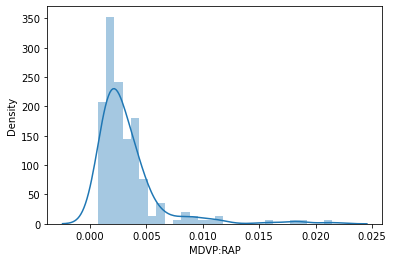

MDVP:PPQ
3.050196424967615


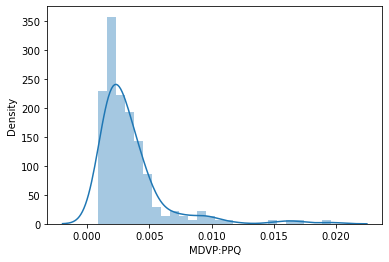

Jitter:DDP
3.3361409999741496


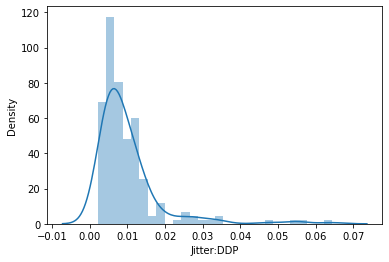

MDVP:Shimmer
1.6536338401467416


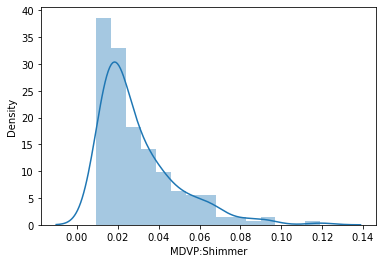

MDVP:Shimmer(dB)
1.983975744958398


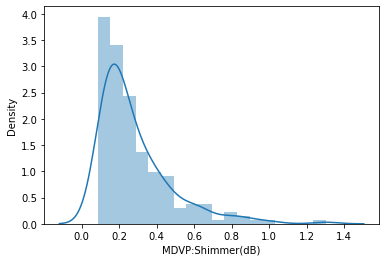

Shimmer:APQ3
1.5683920271611078


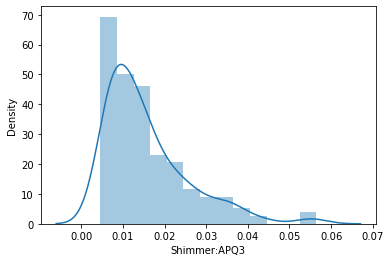

Shimmer:APQ5
1.7848312643056599


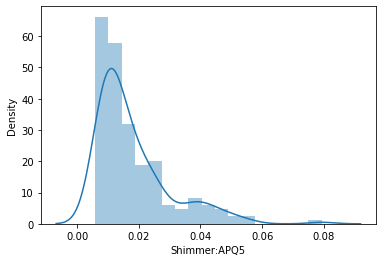

MDVP:APQ
2.5978644961905406


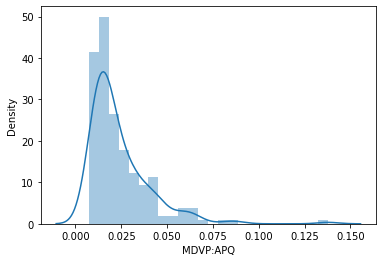

Shimmer:DDA
1.5684333201651852


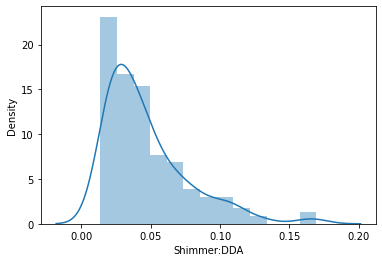

NHR
4.188172511855344


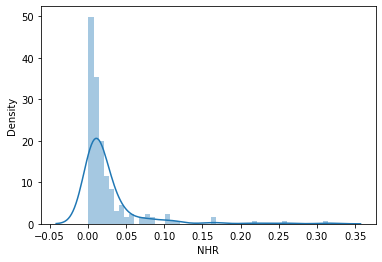

HNR
-0.510352725042725


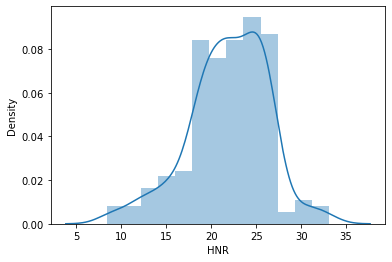

status
-1.1785714285714286


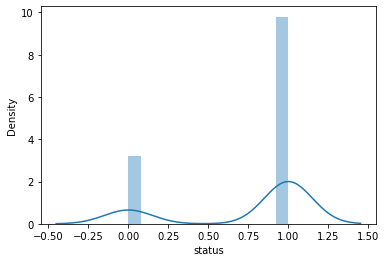

RPDE
-0.14229695276961832


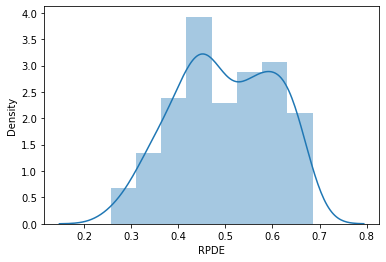

DFA
-0.032957623130060634


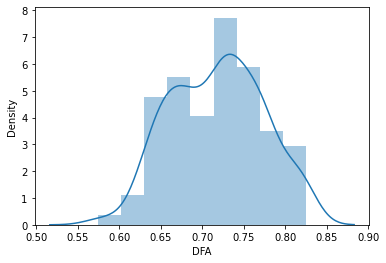

spread1
0.4288076579039929


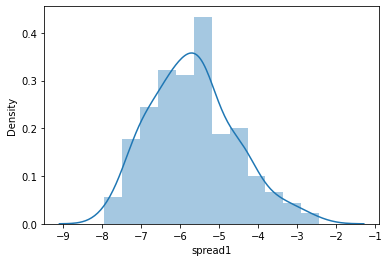

spread2
0.14331709926151373


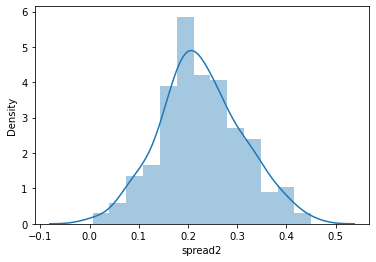

D2
0.42706614648747077


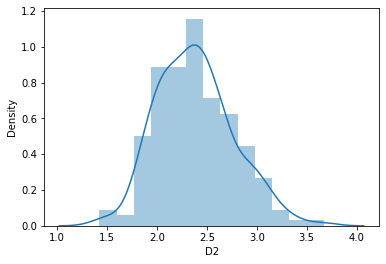

PPE
0.7913433696864662


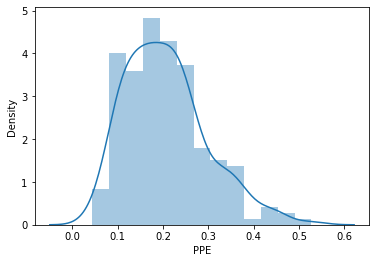

In [16]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [17]:
df["MDVP:Fo(Hz)"]=np.sqrt(df["MDVP:Fo(Hz)"])
df["MDVP:Fhi(Hz)"]=np.sqrt(df["MDVP:Fhi(Hz)"])
df["MDVP:Jitter(%)"]=np.sqrt(df["MDVP:Jitter(%)"])
df["MDVP:Jitter(Abs)"]=np.sqrt(df["MDVP:Jitter(Abs)"])
df["Jitter:DDP"]=np.sqrt(df["Jitter:DDP"])
df["MDVP:Shimmer(dB)"]=np.sqrt(df["MDVP:Shimmer(dB)"])
df["Shimmer:APQ3"]=np.sqrt(df["Shimmer:APQ3"])
df["Shimmer:APQ5"]=np.sqrt(df["Shimmer:APQ5"])
df["MDVP:APQ"]=np.sqrt(df["MDVP:APQ"])
df["Shimmer:DDA"]=np.sqrt(df["Shimmer:DDA"])
df["RPDE"]=np.sqrt(df["RPDE"])
df["NHR"]=np.sqrt(df["NHR"])

MDVP:Fo(Hz)
0.39881004428764855


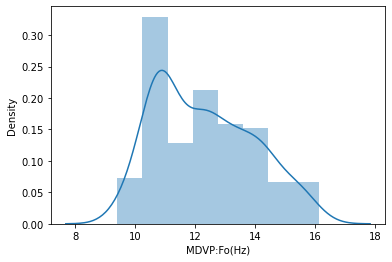

MDVP:Fhi(Hz)
1.7794575863934685


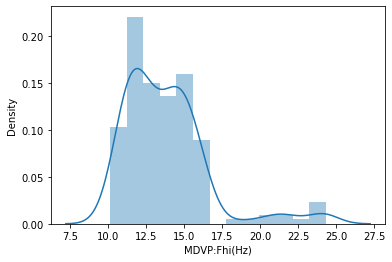

MDVP:Flo(Hz)
1.2079661332354688


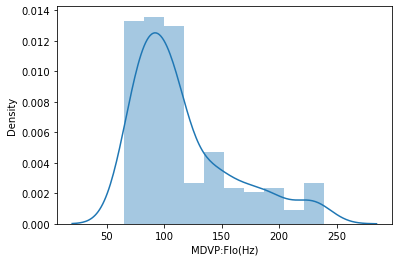

MDVP:Jitter(%)
1.778723255216171


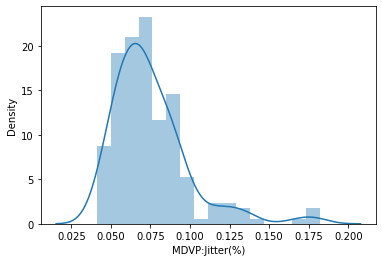

MDVP:Jitter(Abs)
1.0854522210228634


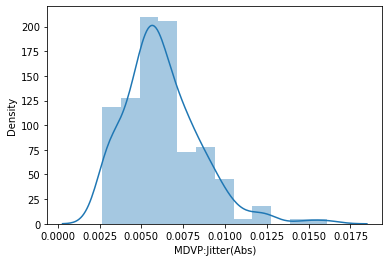

MDVP:RAP
3.334801409433699


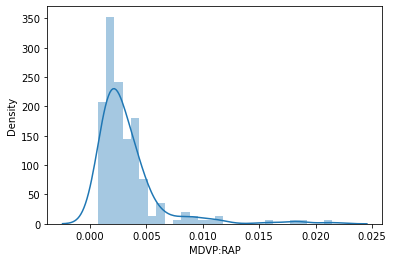

MDVP:PPQ
3.050196424967615


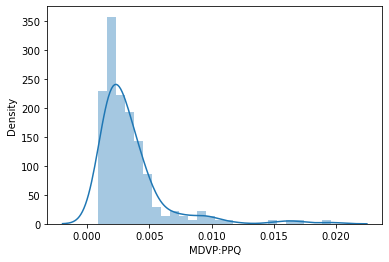

Jitter:DDP
1.901553579504457


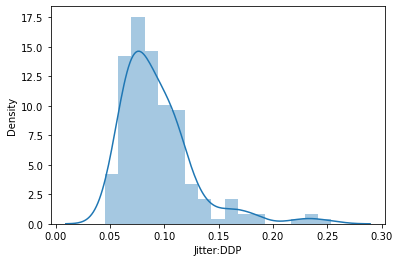

MDVP:Shimmer
1.6536338401467416


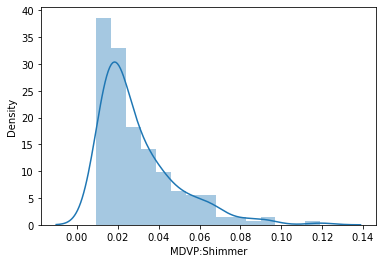

MDVP:Shimmer(dB)
1.160681968704228


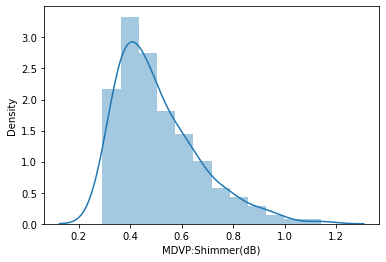

Shimmer:APQ3
0.9028959594778773


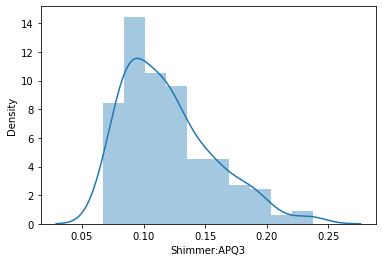

Shimmer:APQ5
1.0947427519803257


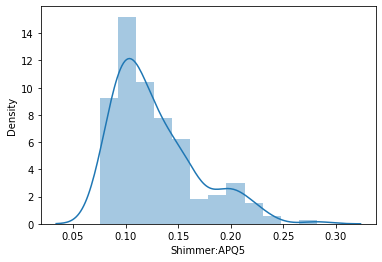

MDVP:APQ
1.3681777028892907


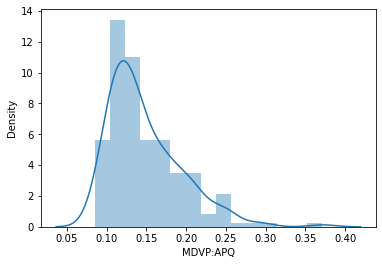

Shimmer:DDA
0.9028903047376864


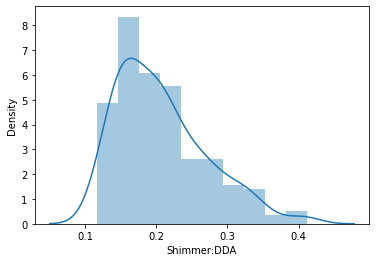

NHR
2.143228067551316


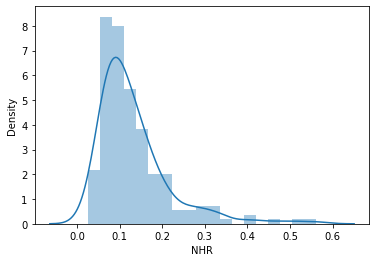

HNR
-0.510352725042725


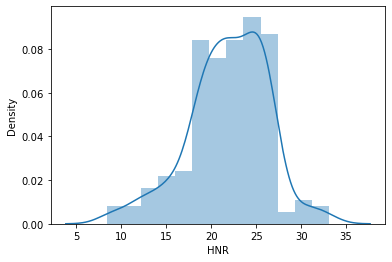

status
-1.1785714285714286


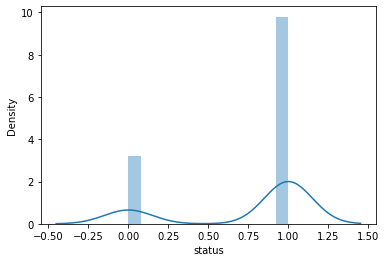

RPDE
-0.32787470011666003


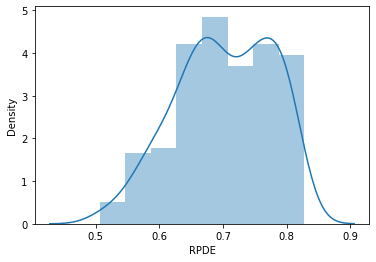

DFA
-0.032957623130060634


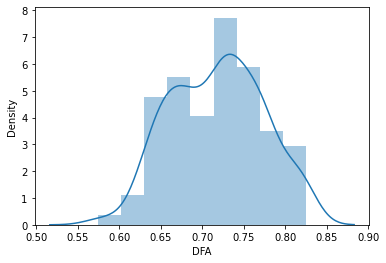

spread1
0.4288076579039929


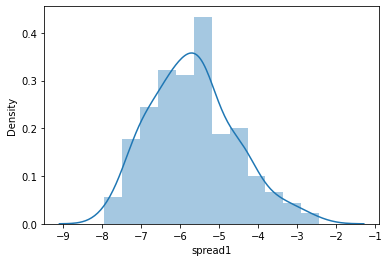

spread2
0.14331709926151373


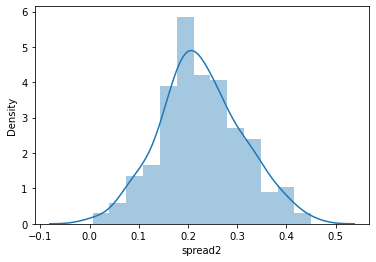

D2
0.42706614648747077


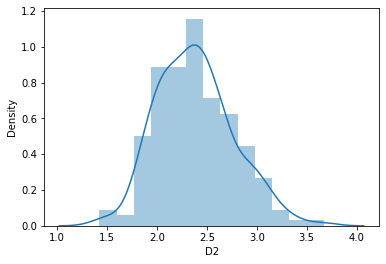

PPE
0.7913433696864662


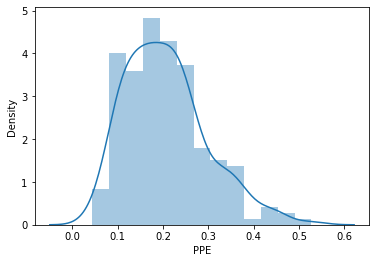

In [18]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

# Dividing the Data into X and Y

In [19]:
x=df.drop(["status"],axis=1)
y=df["status"]

# Scaling the X Variables

In [20]:
from sklearn.preprocessing import StandardScaler
for col in x:
    sc = StandardScaler()
    x[col]= sc.fit_transform(x[[col]])

In [21]:
x.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.832595     -0.438332     -0.952037        0.555163          0.946127   
1    -0.765508     -0.564100     -0.057721        0.958780          1.202654   
2    -0.925919     -0.830823     -0.109875        1.126182          1.443589   
3    -0.926090     -0.726024     -0.114229        1.018765          1.443589   
4    -0.944913     -0.666579     -0.130608        1.570845          1.888217   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.344031      0.745985          0.914783  ...   
1  0.453892  1.276809    0.717158      1.681731          1.783092  ...   
2  0.720770  1.585687    1.001451      1.202693          1.175407  ...   
3  0.578885  1.284076    0.851996      1.340396          1.330651  ...   
4  1.095750  2.047187    1.364825      1.836448          1.613820  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1  \
0  0.525007     0.764804  0.188174 -0.193225 -0.773610  1.760814  0.801323   
1  1.320705     1.565031  0.072956 -0.634508 -0.333925  1.837562  1.479853   
2  0.896599     1.264743 -0.214644 -0.279760 -0.618623  1.942048  1.141445   
3  0.999634     1.399912 -0.192237 -0.281346 -0.567197  1.832380  1.440945   
4  1.370836     1.831673  0.002928 -0.506745 -0.747024  1.909364  1.780940   

    spread2        D2       PPE  
0  0.480477 -0.210531  0.868886  
1  1.311185  0.275077  1.803605  
2  1.017682 -0.103629  1.402661  
3  1.293840  0.062145  1.806954  
4  0.096195 -0.130026  2.267082  

[5 rows x 22 columns]

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Spliting the data into training data and testing data

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Models 

#### Problem Statement : To Identify whether a person has Parkinson's or not using their voice

# Handling Imbalance in the Data 

In [24]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
xsample, ysample = rus.fit_resample(xtrain, ytrain)
pd.Series(ysample).value_counts()

0    38
1    38
Name: status, dtype: int64

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
def mymodel(model):
    model.fit(xsample,ysample)
    ypred=model.predict(xtest)
    print(f"Accuracy:-{accuracy_score(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}\n\n{classification_report(ytest,ypred)}")

In [27]:
model=[]
model.append(("knn",KNeighborsClassifier()))
model.append(("logreg", LogisticRegression()))
model.append(("dt",DecisionTreeClassifier()))
model.append(("dt1",DecisionTreeClassifier(criterion="entropy")))
model.append(("svc",SVC()))
model.append(("xgb",XGBClassifier()))
model.append(("rf",RandomForestClassifier()))
for name,model in model:
    print(name)
    mymodel(model)
    print()
    print()

knn
Accuracy:-0.717948717948718

[[ 8  2]
 [ 9 20]]

              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39



logreg
Accuracy:-0.6923076923076923

[[ 8  2]
 [10 19]]

              precision    recall  f1-score   support

           0       0.44      0.80      0.57        10
           1       0.90      0.66      0.76        29

    accuracy                           0.69        39
   macro avg       0.67      0.73      0.67        39
weighted avg       0.79      0.69      0.71        39



dt
Accuracy:-0.8974358974358975

[[ 7  3]
 [ 1 28]]

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy   

# Creating Dataframe of all the accuracy

In [28]:
Models=["knn","logreg","dt","dt1","svc","xgb","rf"]
Accuracy=[71.7,69.23,89.74,87.17,69.23,84.61,74.35]

In [29]:
dic={"Models":Models,"Accuracy":Accuracy}

In [30]:
df=pd.DataFrame(dic)
df

Models  Accuracy
0     knn     71.70
1  logreg     69.23
2      dt     89.74
3     dt1     87.17
4     svc     69.23
5     xgb     84.61
6      rf     74.35

# Voting Classifier

# Hard Voting

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
knn=KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
dt1 = DecisionTreeClassifier(criterion="entropy")
svc=SVC()
xgb=XGBClassifier()
rf=RandomForestClassifier()


model= [('knn',knn),('lr',lr),('dt',dt),('dt1',dt1),('svc',svc),('xgb',xgb),('rf',rf)]
vc1 =  VotingClassifier(estimators=model)
vc1.fit(xsample,ysample)

[15:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('dt1',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('svc', SVC()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            i...=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_chi

In [33]:
ypred = vc1.predict(xtest)

In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39



In [35]:
print(accuracy_score(ytest,ypred))

0.8205128205128205


# Voting Classifier (Soft)

In [36]:
knn=KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
dt1 = DecisionTreeClassifier(criterion="entropy")
svc=SVC()
xgb=XGBClassifier()
rf=RandomForestClassifier()


model= [('knn',knn),('lr',lr),('dt',dt),('dt1',dt1),('xgb',xgb),('rf',rf)]
vc1 =  VotingClassifier(estimators=model)
vc1.fit(xsample,ysample)

[15:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('dt1',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_con...=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
  

In [37]:
vc2 =  VotingClassifier(estimators=model,voting="soft")

In [38]:
vc2.fit(xsample,ysample)

[15:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('dt1',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_con...
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
        

In [39]:
ypred = vc2.predict(xtest)

In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39



In [41]:
print(accuracy_score(ytest,ypred))

0.8717948717948718


# Hyperparameter Tuning

# KNN Hyperparameter tuning

In [42]:
n = list(range(1,30))

accuracy = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    accuracy.append(ac)

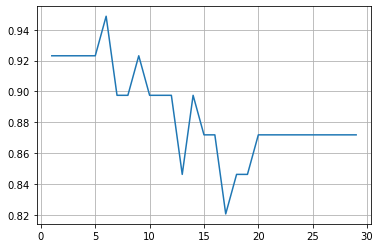

In [43]:
plt.plot(n, accuracy)
plt.grid(True)
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=6)

In [45]:
mymodel(knn)

Accuracy:-0.6923076923076923

[[ 9  1]
 [11 18]]

              precision    recall  f1-score   support

           0       0.45      0.90      0.60        10
           1       0.95      0.62      0.75        29

    accuracy                           0.69        39
   macro avg       0.70      0.76      0.68        39
weighted avg       0.82      0.69      0.71        39



# Logistic Regression Hyperparameter Tuning

In [46]:
logreg = LogisticRegression(solver="liblinear")

In [47]:
mymodel(logreg)

Accuracy:-0.6923076923076923

[[ 8  2]
 [10 19]]

              precision    recall  f1-score   support

           0       0.44      0.80      0.57        10
           1       0.90      0.66      0.76        29

    accuracy                           0.69        39
   macro avg       0.67      0.73      0.67        39
weighted avg       0.79      0.69      0.71        39



# SVM Hyperparameter Tuning

In [48]:
para={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],"kernel":["rbf"]}
from sklearn.model_selection import GridSearchCV
grid  = GridSearchCV(SVC(), para, refit=True, verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [50]:
gpred=grid.predict(xtest)

In [51]:
print(accuracy_score(ytest,gpred))

0.9230769230769231


In [52]:
print(classification_report(ytest,gpred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



# Random Forest Hyperparameter Tuning

In [53]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [54]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
rf_Model = RandomForestClassifier()

In [56]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)


In [57]:
rf_Grid.fit(xsample, ysample)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [58]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [59]:
print(accuracy_score(ytest,ypred))

0.8717948717948718


# XGBOOST Hyperparameter Tuning

In [60]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
classifier=xgboost.XGBClassifier()

In [63]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [64]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [65]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [66]:
ypred=random_search.predict(xtest)

In [67]:
print(accuracy_score(ytest,ypred))

0.9487179487179487


In [68]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



# Creating the Dataframe of Accuracy of the original model and accuracy after the Hyperparameter Tuning

In [69]:
Models=["knn","logreg","svc","xgb","rf"]
Accuracy=[71.17,69.23,89.74,84.61,76.90]
Hyperparameter=[69.23,69.23,92.3,97.4,87.17]


In [70]:
dic={"Models":Models,"Accuracy":Accuracy,"Hyperparameter":Hyperparameter}

In [71]:
df=pd.DataFrame(dic)
df

Models  Accuracy  Hyperparameter
0     knn     71.17           69.23
1  logreg     69.23           69.23
2     svc     89.74           92.30
3     xgb     84.61           97.40
4      rf     76.90           87.17

# Cross Validation

# Cross Validation XG BOOST

In [72]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(XGBClassifier(),x,y,cv=15,scoring="accuracy")
print(f"Accuracy:-{cvs.mean()*100}")
print(f"Standard Deviation:-{cvs.std()}")

[15:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Cross Validation with Decision Tree

In [73]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=15,scoring="accuracy")
print(f"Accuracy:-{cvs.mean()*100}")
print(f"Standard Deviation:-{cvs.std()}")

Accuracy:-80.0
Standard Deviation:-0.11164892849783202


# Cross Validation with Random Forest Classifier

In [74]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=15,scoring="accuracy")
print(f"Accuracy:-{cvs.mean()*100}")
print(f"Standard Deviation:-{cvs.std()}")

Accuracy:-86.15384615384617
Standard Deviation:-0.08970695222838924


# Cross Valdation with Logistic Regression

In [75]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(LogisticRegression(),x,y,cv=15,scoring="accuracy")
print(f"Accuracy:-{cvs.mean()*100}")
print(f"Standard Deviation:-{cvs.std()}")

Accuracy:-81.02564102564105
Standard Deviation:-0.17284409791130995


# Cross Validation with Support Vector Machines

In [76]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(SVC(),x,y,cv=15,scoring="accuracy")
print(f"Accuracy:-{cvs.mean()*100}")
print(f"Standard Deviation:-{cvs.std()}")

Accuracy:-86.66666666666669
Standard Deviation:-0.11738998094625228


# Cross Validation with K Neighbors Classifier

In [77]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(KNeighborsClassifier(),x,y,cv=15,scoring="accuracy")
print(f"Accuracy:-{cvs.mean()*100}")
print(f"Standard Deviation:-{cvs.std()}")

Accuracy:-86.66666666666667
Standard Deviation:-0.095114035851238


# Preparing the dataframe of Accuracy and Standard Deviation

In [78]:
Models=["XGB","Dt","Rf","Logreg","SVC","KNN"]
Accuracy=[91.28,80.51,86.15,81.02,86.67,86.67]
SD=[0.078,0.11,0.098,0.17,0.117,0.095]

In [79]:
dic={"Models": Models,"Accuracy":Accuracy,"SD":SD}
df=pd.DataFrame(dic)

In [80]:
df

Models  Accuracy     SD
0     XGB     91.28  0.078
1      Dt     80.51  0.110
2      Rf     86.15  0.098
3  Logreg     81.02  0.170
4     SVC     86.67  0.117
5     KNN     86.67  0.095

# Thank You